In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

from regressors import stats
from itertools import compress
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf

warnings.filterwarnings("ignore", category=RuntimeWarning)
from matplotlib.dates import DateFormatter, AutoDateLocator, AutoDateFormatter

In [2]:
df_1 = pd.read_csv('500_stocks_1yr.csv')
df_1 = df_1[-120:]
sp_df_1 = pd.read_csv('SPY_1yr.csv')
sp_df_1 = sp_df_1[-120:]

In [3]:
stock_list = ['DTE',
 'CME',
 'RMD',
 'TWLO',
 'UPS',
 'LNC',
 'WMT',
 'EMN',
 'TDY',
 'NCLH',
 'FOXA',
 'RHI',
 'INTC',
 'PRU',
 'SBAC',
 'PAYC',
 'LHX',
 'EQIX',
 'EFX',
 'PYPL',
 'TYL',
 'BE',
 'SNPS',
 'TXT',
 'LIN',
 'KR',
 'CMCSA',
 'WHR',
 'NTRS',
 'GRMN',
 'PRGO',
 'PGR',
 'BAX',
 'SWK',
 'TXN',
 'PENN',
 'PNC',
 'HSIC',
 'FTNT',
 'FMC',
 'HCA',
 'HPQ',
 'PTC',
 'MET',
 'SNOW',
 'UAL',
 'ITW',
 'PFE',
 'ACN',
 'NVDA',
 'CTAS',
 'LUMN',
 'PKG',
 'TTD',
 'NTAP',
 'ZS',
 'NEE',
 'NFLX',
 'WYNN',
 'ZM',
 'ALK',
 'CHD',
 'TPR',
 'SYF',
 'FCX',
 'XEL',
 'AEP',
 'PLTR',
 'MDLZ',
 'BXP',
 'HIG',
 'ABNB',
 'EA',
 'SHW',
 'HPE',
 'TMO',
 'XYL',
 'JNJ',
 'MMC',
 'NWL',
 'LYB',
 'NEM',
 'AWK',
 'TFX',
 'MPWR',
 'UNP',
 'FRT',
 'YUM',
 'LVS',
 'CNC',
 'CTLT',
 'HD',
 'DRI',
 'KHC',
 'VRSK',
 'AVY',
 'DD',
 'RF',
 'DOV',
 'UAA',
 'OKTA',
 'ZBRA',
 'KO',
 'AON',
 'CRL',
 'BR',
 'MCD',
 'MSCI',
 'HBAN',
 'IR',
 'K',
 'ADP',
 'OKE',
 'SHOP',
 'PSX',
 'FISV',
 'EXPD',
 'CMG',
 'MOH',
 'MS',
 'TMUS',
 'PPG',
 'PG',
 'MGM',
 'EXC',
 'DXCM',
 'BMY',
 'CCL',
 'BAC',
 'SEE',
 'MAA',
 'AFRM',
 'ORCL',
 'ESS',
 'RIVN',
 'RTX',
 'PNW',
 'QRVO',
 'SPGI',
 'NOVA',
 'GILD',
 'FDS',
 'NOC',
 'SBUX',
 'GIII',
 'PLUG',
 'TGT',
 'SNAP',
 'CE',
 'GLW',
 'CAH',
 'AMAT',
 'ATEN',
 'MTD',
 'EW',
 'WMB',
 'RUN',
 'PH',
 'NVR',
 'EZPW',
 'FITB',
 'IEX',
 'SPG',
 'WELL',
 'MLM',
 'WAB',
 'DUK',
 'PEP',
 'TRUP',
 'PVH',
 'CMA',
 'ED',
 'LH',
 'BSX',
 'ROKU',
 'LMT',
 'PINS',
 'MTB',
 'POOL',
 'VFC',
 'ETR',
 'MO',
 'DE',
 'AME',
 'HAS',
 'JNPR',
 'LRCX',
 'JPM',
 'T',
 'MOS',
 'STZ',
 'UA',
 'LKQ',
 'COST',
 'BIO',
 'STT',
 'MAS',
 'HLIT',
 'SQ',
 'PFG',
 'OFIX',
 'PTON',
 'CFG',
 'MCK',
 'CINF',
 'CRM',
 'REGN',
 'CSX',
 'KMI',
 'GL',
 'PM',
 'MKC',
 'HUM',
 'HWM',
 'NKE',
 'WRB',
 'CVS',
 'ZBH',
 'IQV',
 'WBA',
 'HON',
 'PSA',
 'AIG',
 'WFC',
 'PEG',
 'XRAY',
 'MAR',
 'SYY',
 'NWSA',
 'TEL',
 'ULTA',
 'ATO',
 'WU',
 'KEY',
 'SNA',
 'MNST',
 'HOLX',
 'AMD',
 'SYK',
 'ES',
 'AZO',
 'TFC',
 'BBY',
 'MA',
 'TROW',
 'FSLR',
 'CAT',
 'LDOS',
 'CHTR',
 'RSG',
 'URI',
 'RJF',
 'TRMB',
 'HRL',
 'EVGO',
 'CMS',
 'IRBT',
 'ROL',
 'HAL',
 'CSCO',
 'VTRS',
 'CNP',
 'EL',
 'NUE',
 'SANM',
 'DDOG',
 'CBOE',
 'VTR',
 'PWR',
 'NWS',
 'CTSH',
 'GWW',
 'COF',
 'TDG',
 'BLNK',
 'AMP',
 'MKTX',
 'SO',
 'MSFT',
 'GS',
 'SCHW',
 'PNR',
 'C',
 'COP',
 'PLD',
 'TAP',
 'IP',
 'MCO',
 'NI',
 'SJM',
 'CHPT',
 'ISRG',
 'DASH',
 'OGN',
 'IPG',
 'BLK',
 'BDX',
 'ILMN',
 'DXC',
 'BTI',
 'APD',
 'EOG',
 'FE',
 'KMX',
 'DPZ',
 'GPC',
 'AVB',
 'CCI',
 'NET',
 'TSLA',
 'LCID',
 'INTU',
 'MHK',
 'U',
 'O',
 'MPC',
 'BK',
 'AMGN',
 'HSY',
 'LEN',
 'CLX',
 'BKR',
 'CDNS',
 'TT',
 'ROP',
 'NSC',
 'TER',
 'OXY',
 'ARE',
 'ADI',
 'ROST',
 'DENN',
 'LGIH',
 'NAVI',
 'WY',
 'ABT',
 'RCL',
 'USB',
 'FCEL',
 'APA',
 'EQR',
 'NOV',
 'SLB',
 'APTV',
 'HLT',
 'BYND',
 'IBM',
 'IT',
 'MRNA',
 'AVGO',
 'CB',
 'APH',
 'MDT',
 'NDAQ',
 'ECL',
 'VNO',
 'PPL',
 'WEC',
 'JBLU',
 'AXP',
 'EMR',
 'FTV',
 'LLY',
 'V',
 'IVZ',
 'LNT',
 'KMB',
 'GPN',
 'ROK',
 'XOM',
 'WST',
 'ADBE',
 'ORLY',
 'DLR',
 'CPB',
 'DLTR',
 'DVA',
 'KEYS',
 'UHS',
 'IFF',
 'BWA',
 'AMC',
 'VZ',
 'BCOV',
 'TSCO',
 'HES',
 'DG',
 'J',
 'AMZN',
 'AAPL',
 'KLAC',
 'CAKE',
 'LYV',
 'EBAY',
 'DOW',
 'KMPR',
 'EXR',
 'MMM',
 'ENPH',
 'OMC',
 'WM',
 'LUV',
 'NOW',
 'PAYX',
 'D',
 'PCAR',
 'HST',
 'REG',
 'NRG',
 'META',
 'SPCE',
 'BKNG',
 'CHRW',
 'RBLX',
 'BG',
 'TTWO',
 'GNRC',
 'IRM',
 'QCOM',
 'UNM',
 'STE',
 'JKHY',
 'GD',
 'WDC',
 'UDR',
 'INCY',
 'MCHP',
 'VRTX',
 'BRO',
 'MRO',
 'DIS',
 'CPRT',
 'BA',
 'GM',
 'IDXX',
 'MU',
 'FFIV',
 'DVN',
 'UNH',
 'VLO',
 'DAL',
 'COIN',
 'MSI',
 'CF',
 'FDX',
 'DHR',
 'GIS',
 'GOOG',
 'LOW',
 'CZR',
 'LEG',
 'GOOGL',
 'GE',
 'CI',
 'CTVA',
 'PLAB',
 'EIX',
 'ICE',
 'AMT',
 'CDW',
 'SRE',
 'L',
 'SWKS',
 'DGX',
 'ADM',
 'TSN',
 'CL',
 'ANET',
 'VRSN',
 'RL',
 'EVRG',
 'SEDG',
 'ODFL',
 'DFS',
 'AAL',
 'HII',
 'VMC',
 'DHI',
 'ABBV',
 'LW',
 'PHM',
 'ZTS',
 'JCI',
 'COO',
 'CRWD',
 'BEN',
 'OTIS',
 'KIM',
 'ZION',
 'FOX',
 'NXPI',
 'CAG',
 'ETSY',
 'CVX',
 'WAT',
 'FAST',
 'STX',
 'ETN',
 'FIS',
 'ANSS',
 'AOS',
 'F',
 'MRK',
 'JBHT',
 'CMI',
 'TJX',
 'BIIB',
 'TRV']

In [4]:
def standardize_data(df):
    df_dates = df['Date']

    test_df = df.copy()
    test_df.drop(['Date'],inplace=True,axis=1)
    test_df = test_df.apply(pd.to_numeric, errors='coerce')

    df_returns = test_df.pct_change(fill_method=None)

    # print(df_returns)

    df_standardized = (df_returns - df_returns.mean()) / df_returns.std()
    df_standardized = df_standardized.fillna(0)

    no_date_sd = df_standardized.copy()
    df_standardized['Date'] = df_dates

    return df_standardized,no_date_sd,df_dates,df_returns

def calculate_eigenportfolio(df_standardized,no_date_sd,df_returns,n):

    date_column = list(df_standardized['Date'])
    covariance_matrix = no_date_sd.cov()

    ## PCA and std of Stocks. 
    pca = PCA(n_components=n)
    pca.fit(covariance_matrix)
    eigen_vectors = pca.components_
    eigen_values = pca.explained_variance_ ## This is when there is a square matrix.

    variance_percentage = (eigen_values / np.sum(eigen_values))*100

    std_stocks = list(df_returns.std())
    std_stocks = np.array(std_stocks)

    ## We standardize the eigen_vectors using the std the stocks.
    eigen_portfolio = eigen_vectors/std_stocks

    df_no_date = df_standardized.drop('Date',axis=1)
    df_no_date = df_no_date.to_numpy().transpose()

    eigenportfolio_returns = np.dot(eigen_portfolio, df_no_date)

    return eigenportfolio_returns,variance_percentage

def calculate_ep_returns(eigenvectors):
    to_append_return = []

    n = len(eigenvectors)
    for i in range(0,n):
        eigenportfolio_returns_save = (eigenvectors[i] - np.mean(eigenvectors[i])) / np.std(eigenvectors[i])
        to_append_return.append(eigenportfolio_returns_save)

    return to_append_return

def plot_variance_percentage(variance_percentage):
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(variance_percentage) + 1), variance_percentage, alpha=0.7, color='blue')
    plt.step(range(1, len(variance_percentage) + 1), np.cumsum(variance_percentage), where='mid', linestyle='--', color='orange', label='Cumulative Variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Variance Explained (%)')
    plt.title('Eigenvalues as Percentage of Variance Explained')
    plt.legend(loc='best')
    plt.show()

def plot_eigenportfolio_returns(ep_returns,sp_df_standardized,date_column):
    # Create figure and subplots grid
    n = len(ep_returns)  # Number of eigenportfolios
    rows = int(np.ceil(n/2))  # Calculate number of rows needed
    fig, axes = plt.subplots(rows, 3, figsize=(30, 5*rows))
    axes = axes.ravel()  # Flatten axes array for easier iteration


    # Plot each eigenportfolio in its own subplot
    for i in range(n):
        # Plot cumulative returns and returns on same subplot

        axes[i].plot(date_column, np.cumsum(ep_returns[i]), 
                    label='EigenPortfolio Cumulative Returns')
        axes[i].plot(date_column, ep_returns[i], 
                    label='Eigenportfolio Returns', alpha=0.5)
        axes[i].plot(date_column, np.cumsum(sp_df_standardized), 
                    label='SPY Returns', alpha=0.5)
        
        # Customize each subplot
        axes[i].set_title(f'Eigenportfolio {i+1}')
        axes[i].set_xlabel('Days')
        axes[i].set_ylabel('Returns')
        axes[i].axhline(0, color="gray", linestyle="--", linewidth=1)
        axes[i].grid(True)
        axes[i].legend()
        
        # Set date locator
        axes[i].xaxis.set_major_locator(AutoDateLocator(maxticks=8))

    # Remove empty subplots if odd number of eigenportfolios
    for i in range(n, len(axes)):
        fig.delaxes(axes[i])  # Remove the unused subplot

    # Adjust layout
    plt.tight_layout()
    plt.show()

def find_residual(stock,ep_returns):
    ridge_model = Ridge(alpha=1.0)  # Set regularization strength (alpha)
    ridge_model.fit(ep_returns, stock)

    predicted_stock_return = ridge_model.predict(ep_returns)
    residual = predicted_stock_return - stock

    return residual

def find_eligible_stock(df_standardized,eigen_return,stock_list):
    dict_value_trade = {}
    dict_value_no = {}
    for stock_name in stock_list:

        stock_return = np.array(df_standardized[stock_name])
        residual = find_residual(stock_return,eigen_return)
    # Extract parameters

        model = AutoReg(residual, lags=1, old_names=False)
        results = model.fit()

        b = results.params[1]   # AR(1) coefficient

        if b <= 0:
            dict_value_no[stock_name] = b
        else:
            dict_value_trade[stock_name] = b

    sorted_dict_trade = dict(sorted(dict_value_trade.items(), key=lambda item: item[1]))
    sorted_dict_no = dict(sorted(dict_value_no.items(), key=lambda item: item[1]))

    return sorted_dict_trade,sorted_dict_no

def calculate_s_score(stock_name,df_standardized,eigen_return):
    stock_return = np.array(df_standardized[stock_name])
    residual = find_residual(stock_return,eigen_return)

    cum_residual = residual.sum()  ## Done

    mu = np.mean(residual.cumsum())  ## Done

    model = AutoReg(residual, lags=1, old_names=False)
    results = model.fit()

    ##a = results.params[0]   # Intercept ## Apparantely we dont use this. Haha.
    b = results.params[1]   # AR(1) coefficient
    
    var = (np.std(residual.cumsum())**2 * (1- math.exp(2 * np.log(b) *252))) / (2 * -np.log(b)*252)
    sigma_eq = np.sqrt(var/(1- (b*b)))
    sigma = np.sqrt((var*(2*-np.log(b)*252))/1-(b*b))

    s_score = (cum_residual - mu)/sigma

    return s_score    

def plot_s_scores(s_score_stocks,df_standardized,keys_):

    if len(keys_) == 1:

        trade_name = keys_[0]

        s_score_final = np.array(s_score_stocks[trade_name])
        stock_return = np.array(df_standardized[trade_name])
        date_60 = list(df_standardized['Date'])

        fig, ax = plt.subplots(figsize=(20, 3))

        locator = AutoDateLocator(minticks=8)
        formatter = AutoDateFormatter(locator)
        ax.xaxis.set_major_locator(locator)

        ax.axhline(-1.25, color='green', linestyle='--', linewidth=1, label="buy to open")
        ax.axhline(1.25, color='red', linestyle='--', linewidth=1, label="sell to open")

        #plt.plot(date_60,s_score.cumsum(),label='s-score cumsum()')
        plt.plot(date_60,-1*s_score_final[1:],label='s_score')
        plt.scatter(date_60,-1*s_score_final[1:],label='s_score')
        plt.scatter(date_60,stock_return.cumsum(),label='s_score')
        plt.plot(date_60,stock_return.cumsum(),label=f'stock cumsum() of {trade_name}')


        plt.xlabel('Date')
        plt.ylabel('S-Score')
        plt.title(f'S-Score and Cumulative Stock Trends with Buy/Sell Signals {trade_name}')
        ax.legend(fontsize=8)
        plt.show()


    else:

        # Create figure and subplots grid
        n = len(keys_)  # Number of eigenportfolios
        rows = int(np.ceil(n/2))  # Calculate number of rows needed
        fig, axes = plt.subplots(rows, 3, figsize=(30, 5*rows))
        axes = axes.ravel()  # Flatten axes array for easier iteration

         # Plot each eigenportfolio in its own subplot
        for i,trade_name in enumerate(keys_):

            s_score_final = np.array(s_score_stocks[trade_name])
            stock_return = np.array(df_standardized[trade_name])
            date_60 = list(df_standardized['Date'])

            axes[i].axhline(-1.25, color='green', linestyle='--', linewidth=1, label="buy to open")
            axes[i].axhline(1.25, color='red', linestyle='--', linewidth=1, label="sell to open")


            axes[i].plot(date_60,-1*s_score_final[1:],label='s_score')
            axes[i].scatter(date_60,-1*s_score_final[1:],label='s_score')
            axes[i].plot(date_60,stock_return.cumsum(),label=f'stock cumsum() of {trade_name}')
            axes[i].scatter(date_60,stock_return.cumsum(),label=f'stock cumsum() of {trade_name}')

            axes[i].set_xlabel('Days')
            axes[i].set_ylabel('S-Score')
            axes[i].legend(fontsize=12)

            axes[i].set_title(f'S-Score and Cumulative Stock Trends with Buy/Sell Signals {trade_name}')
            
            # Set date locator
            axes[i].xaxis.set_major_locator(AutoDateLocator(minticks=8))

        # Remove empty subplots if odd number of eigenportfolios
        for i in range(n, len(axes)):
            fig.delaxes(axes[i])  # Remove the unused subplot

        # Adjust layout
        plt.tight_layout()
        plt.show()

In [5]:
df = df_1[:60].reset_index(drop=True)
sp_df = sp_df_1[:60].reset_index(drop=True)


df_1 = df_1[:120].reset_index(drop=True)
sp_df_1 = sp_df_1[:120].reset_index(drop=True)

In [6]:
df_standardized,no_date_sd,df_dates,df_returns = standardize_data(df)
sp_df_standardized,sp_no_date_df,sp_df_dates,standard_sp_df_returns = standardize_data(sp_df)

sp_df_standardized = sp_df_standardized['SPY']
date_column = list(df_standardized['Date'])

In [7]:
eg_vectors,variance_percentage = calculate_eigenportfolio(df_standardized,no_date_sd,df_returns,15)
ep_returns = calculate_ep_returns(eg_vectors) ## The eigenportfolio returns are our factors before regressing with the returns of a particular stock.

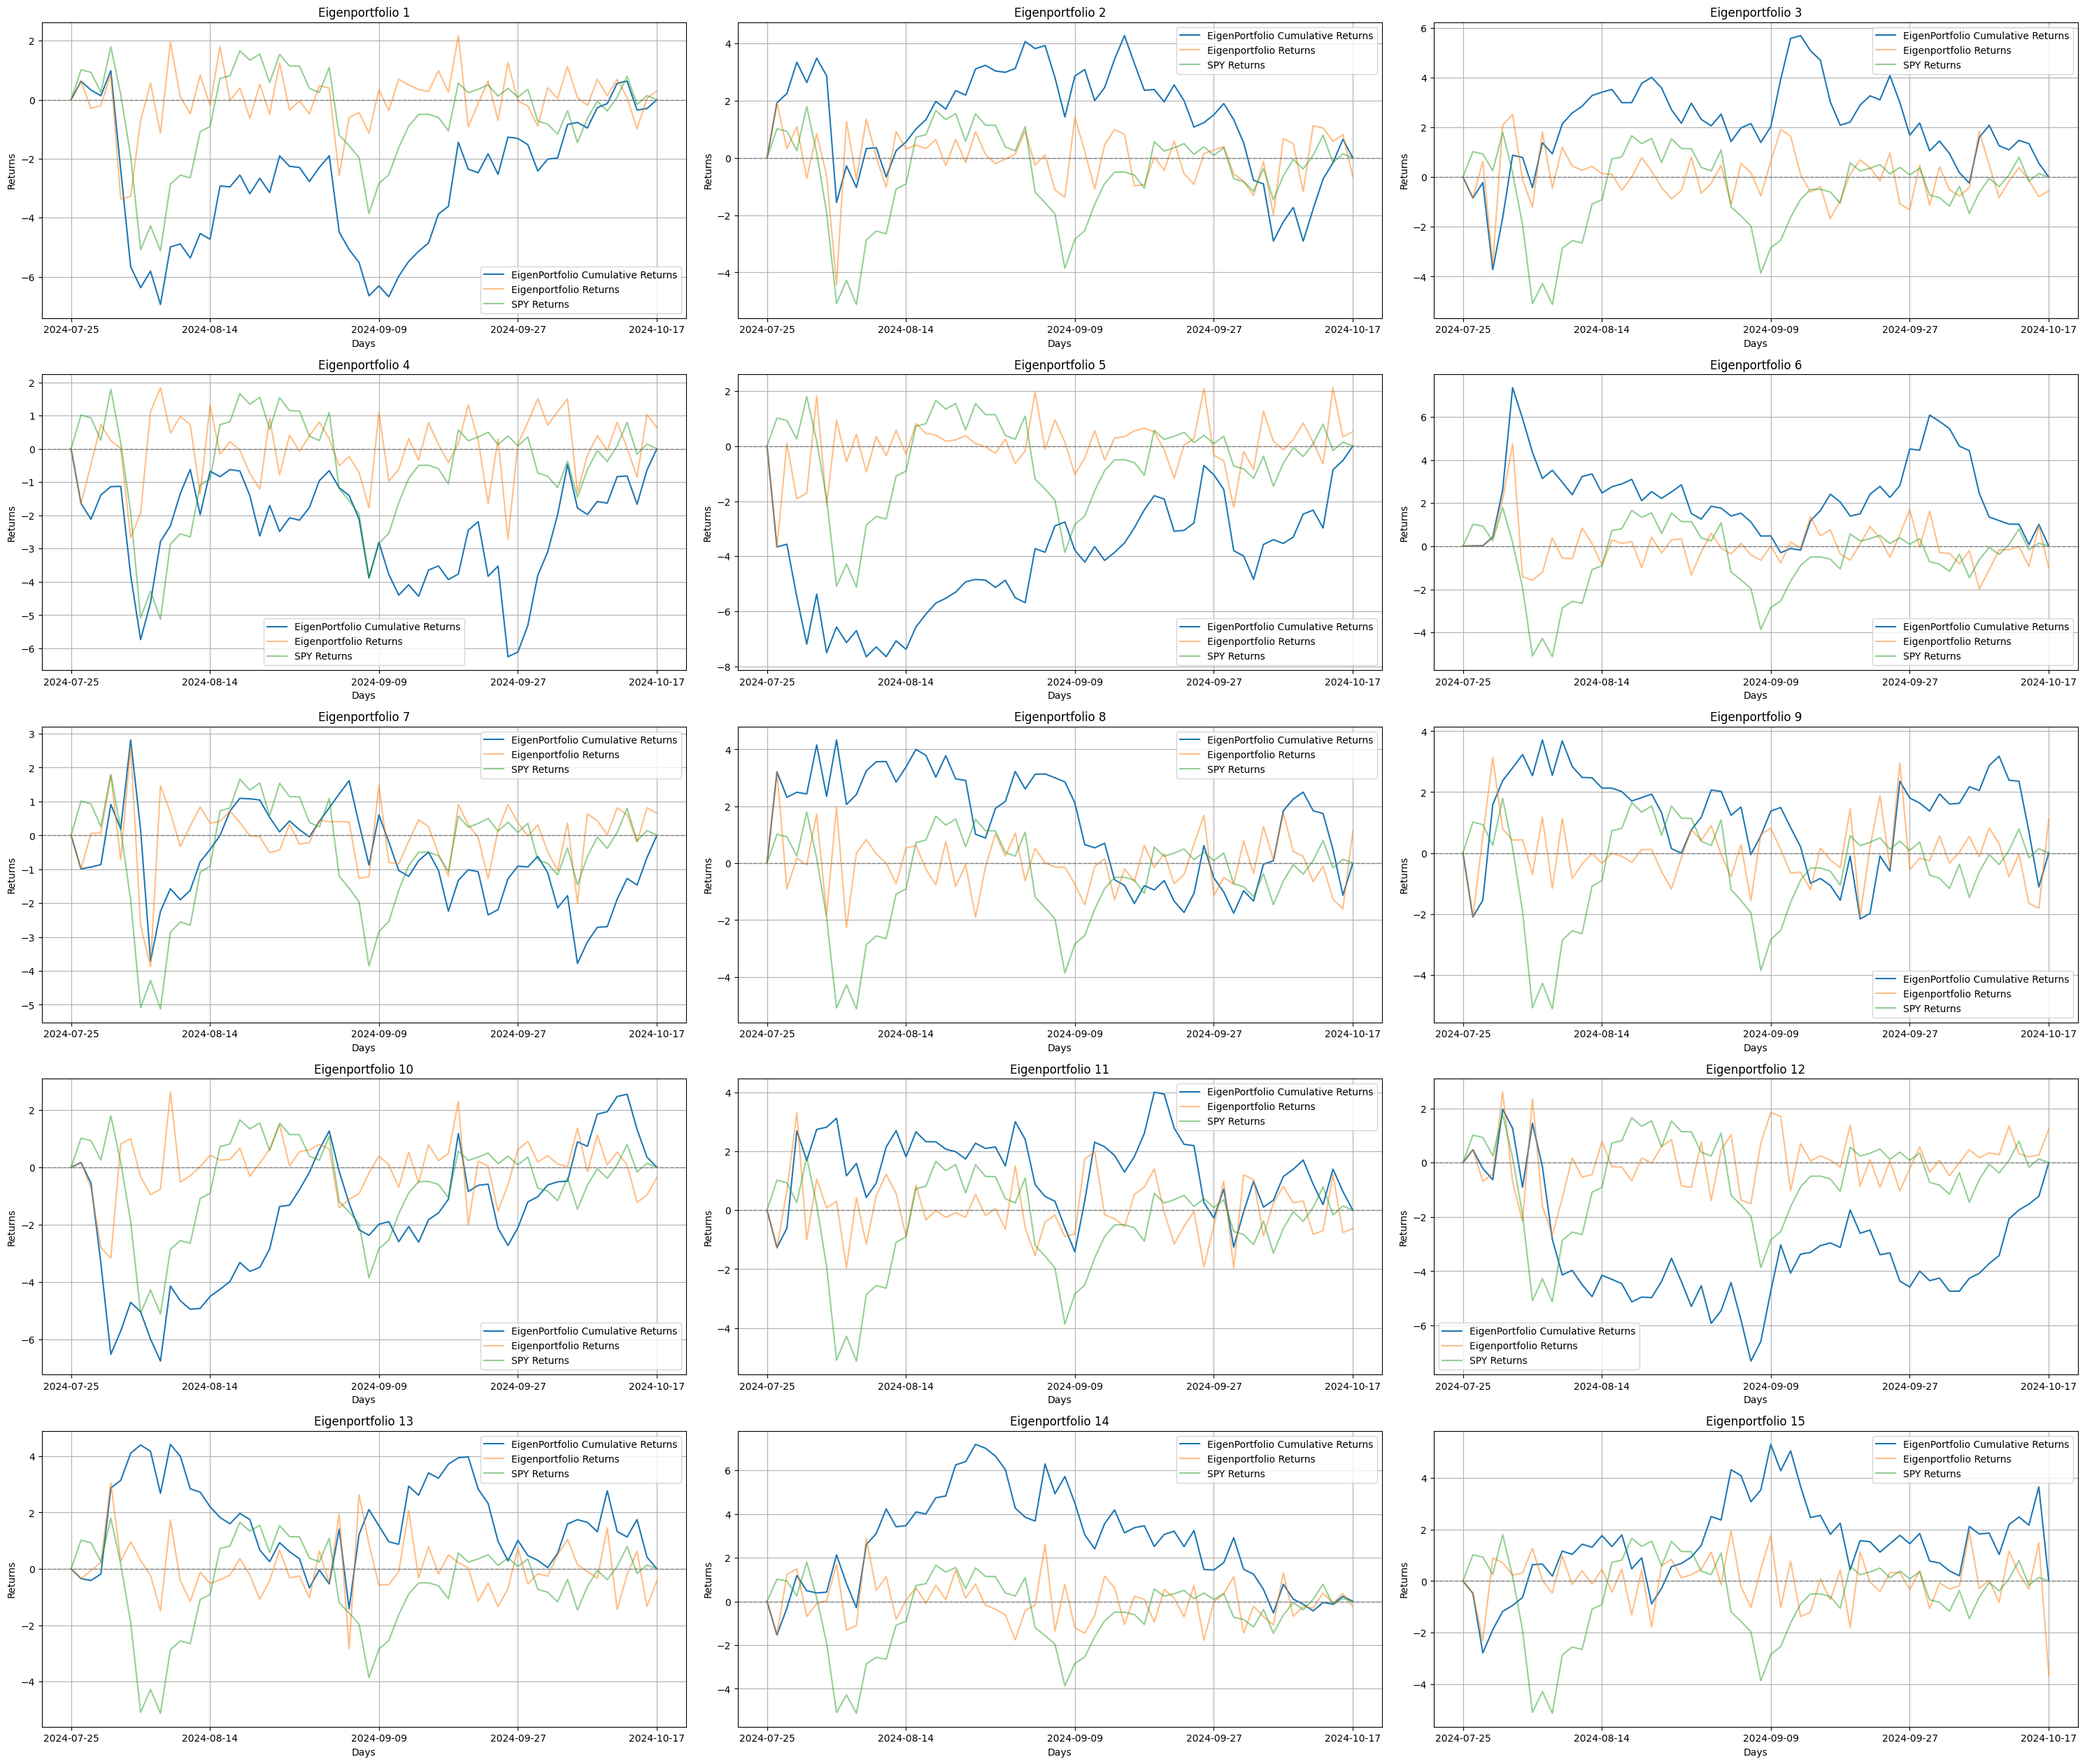

In [9]:
plot_eigenportfolio_returns(ep_returns,sp_df_standardized,date_column)

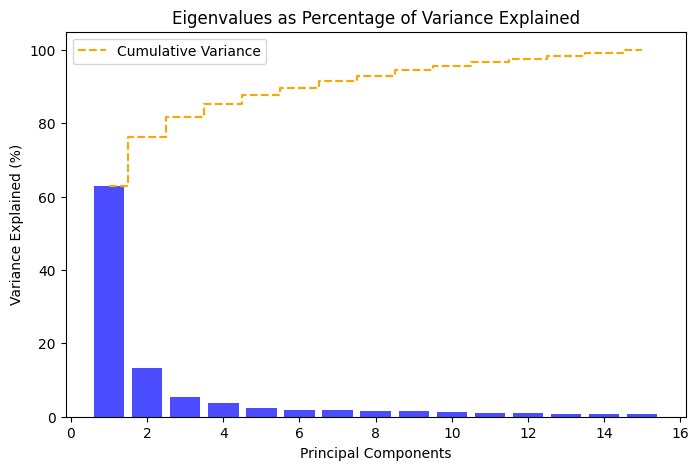

In [22]:
plot_variance_percentage(variance_percentage)

In [10]:
portfolio_num = 10 ## By looking at the chart.

In [11]:
to_append_return = np.array(ep_returns)
eigen_return = to_append_return[:portfolio_num].transpose()

In [12]:
stock_to_trade,stock_not_to_trade = find_eligible_stock(df_standardized,eigen_return,stock_list)

In [13]:
list_stock_name = list(stock_to_trade.keys())
s_score_stocks = {}

In [14]:
for trade_name in list_stock_name:

    window_size = 60
    # print(trade_name)

    list_s_score = []

    for start in range(len(df_1)-window_size + 1):
        end = start+window_size

        #print(start,end)

        window_df = df_1.iloc[start:end].reset_index(drop=True)
        window_sp_df = sp_df_1.iloc[start:end].reset_index(drop=True)

        df_standardized,no_date_sd,df_dates,df_returns = standardize_data(window_df)
        sp_df_standardized,sp_no_date_df,sp_df_dates,standard_sp_df_returns = standardize_data(window_sp_df)

        sp_df_standardized = sp_df_standardized['SPY']
        date_column = list(df_standardized['Date'])

        eg_vectors = calculate_eigenportfolio(df_standardized,no_date_sd,df_returns,portfolio_num)
        ep_returns = calculate_ep_returns(eg_vectors) ## The eigenportfolio returns are our factors before regressing with the returns of a particular stock.

        #print(ep_returns)
        #to_append_return = np.array(ep_returns)
        eigen_return = to_append_return[:portfolio_num].transpose()

        list_s_score.append(calculate_s_score(trade_name,df_standardized,eigen_return))

    s_score_stocks[trade_name] = list_s_score

In [15]:
def count_nans(array_list):
    return sum(np.isnan(arr).sum() for arr in array_list)

nan_counts = {key: count_nans(value) for key, value in s_score_stocks.items()}
min_nan_count = min(nan_counts.values())
keys_with_0_nans = [key for key, count in nan_counts.items() if count == 0]
keys_with_10_nans = [key for key, count in nan_counts.items() if count <= 10]

print('These are the Stocks I would want to trade confidently.')
print(keys_with_0_nans)
print('These are the stocks I would be cautious about')
print(keys_with_10_nans[:20])
print(keys_with_10_nans[20:])

These are the Stocks I would want to trade confidently.
['GOOGL', 'VMC', 'HON', 'KMI', 'MCK', 'MLM']
These are the stocks I would be cautious about
['OGN', 'LDOS', 'O', 'PVH', 'NWL', 'KHC', 'INCY', 'PAYC', 'FTNT', 'ABBV', 'BXP', 'APH', 'LLY', 'GOOG', 'BTI', 'JNPR', 'FE', 'GOOGL', 'DXC', 'UHS']
['WEC', 'VNO', 'OKE', 'ATO', 'TPR', 'HUM', 'BCOV', 'OKTA', 'AVGO', 'CHRW', 'VMC', 'ZM', 'ARE', 'HAL', 'HON', 'EVGO', 'GIII', 'EIX', 'KMI', 'CRL', 'EL', 'KMB', 'MCK', 'DUK', 'MLM', 'J']


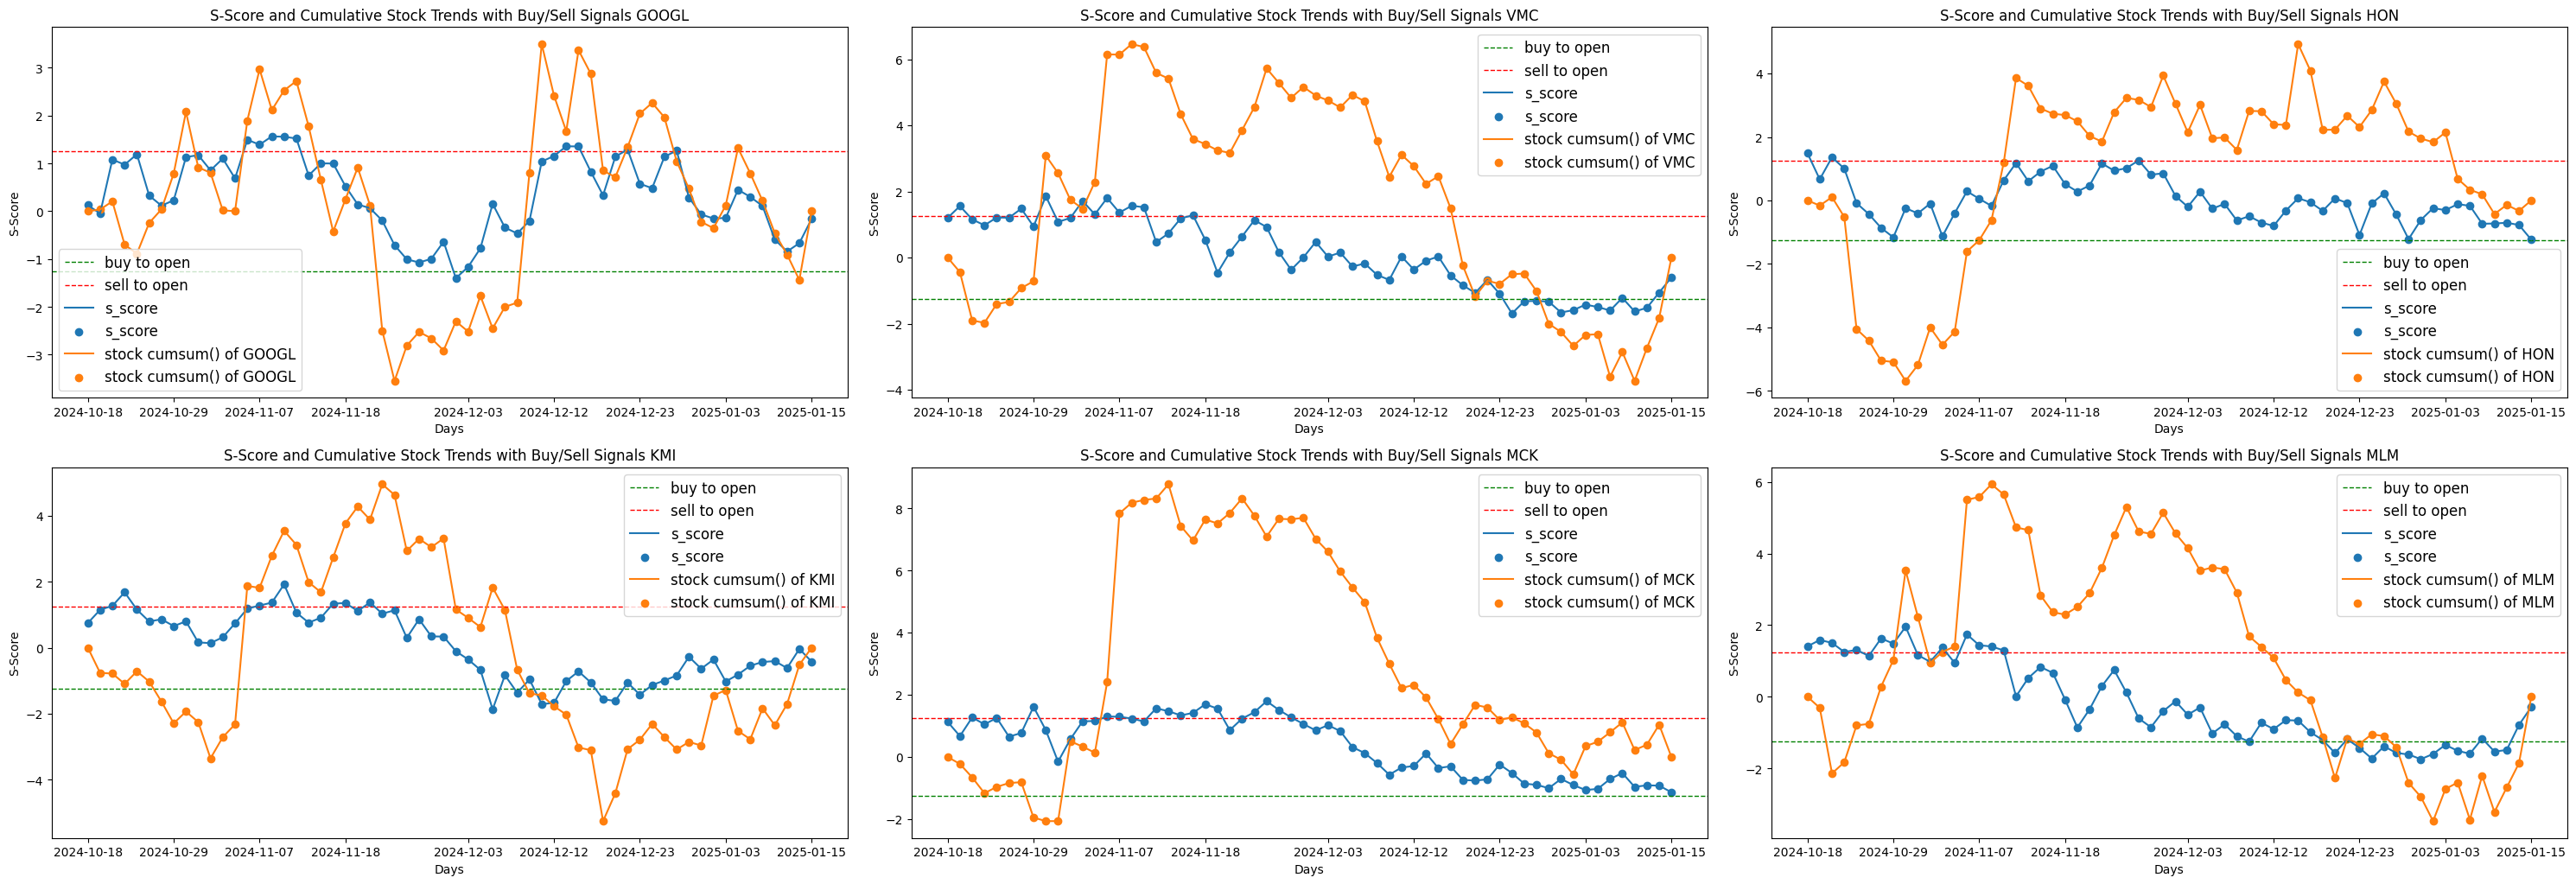

In [16]:
plot_s_scores(s_score_stocks,df_standardized,keys_with_0_nans)

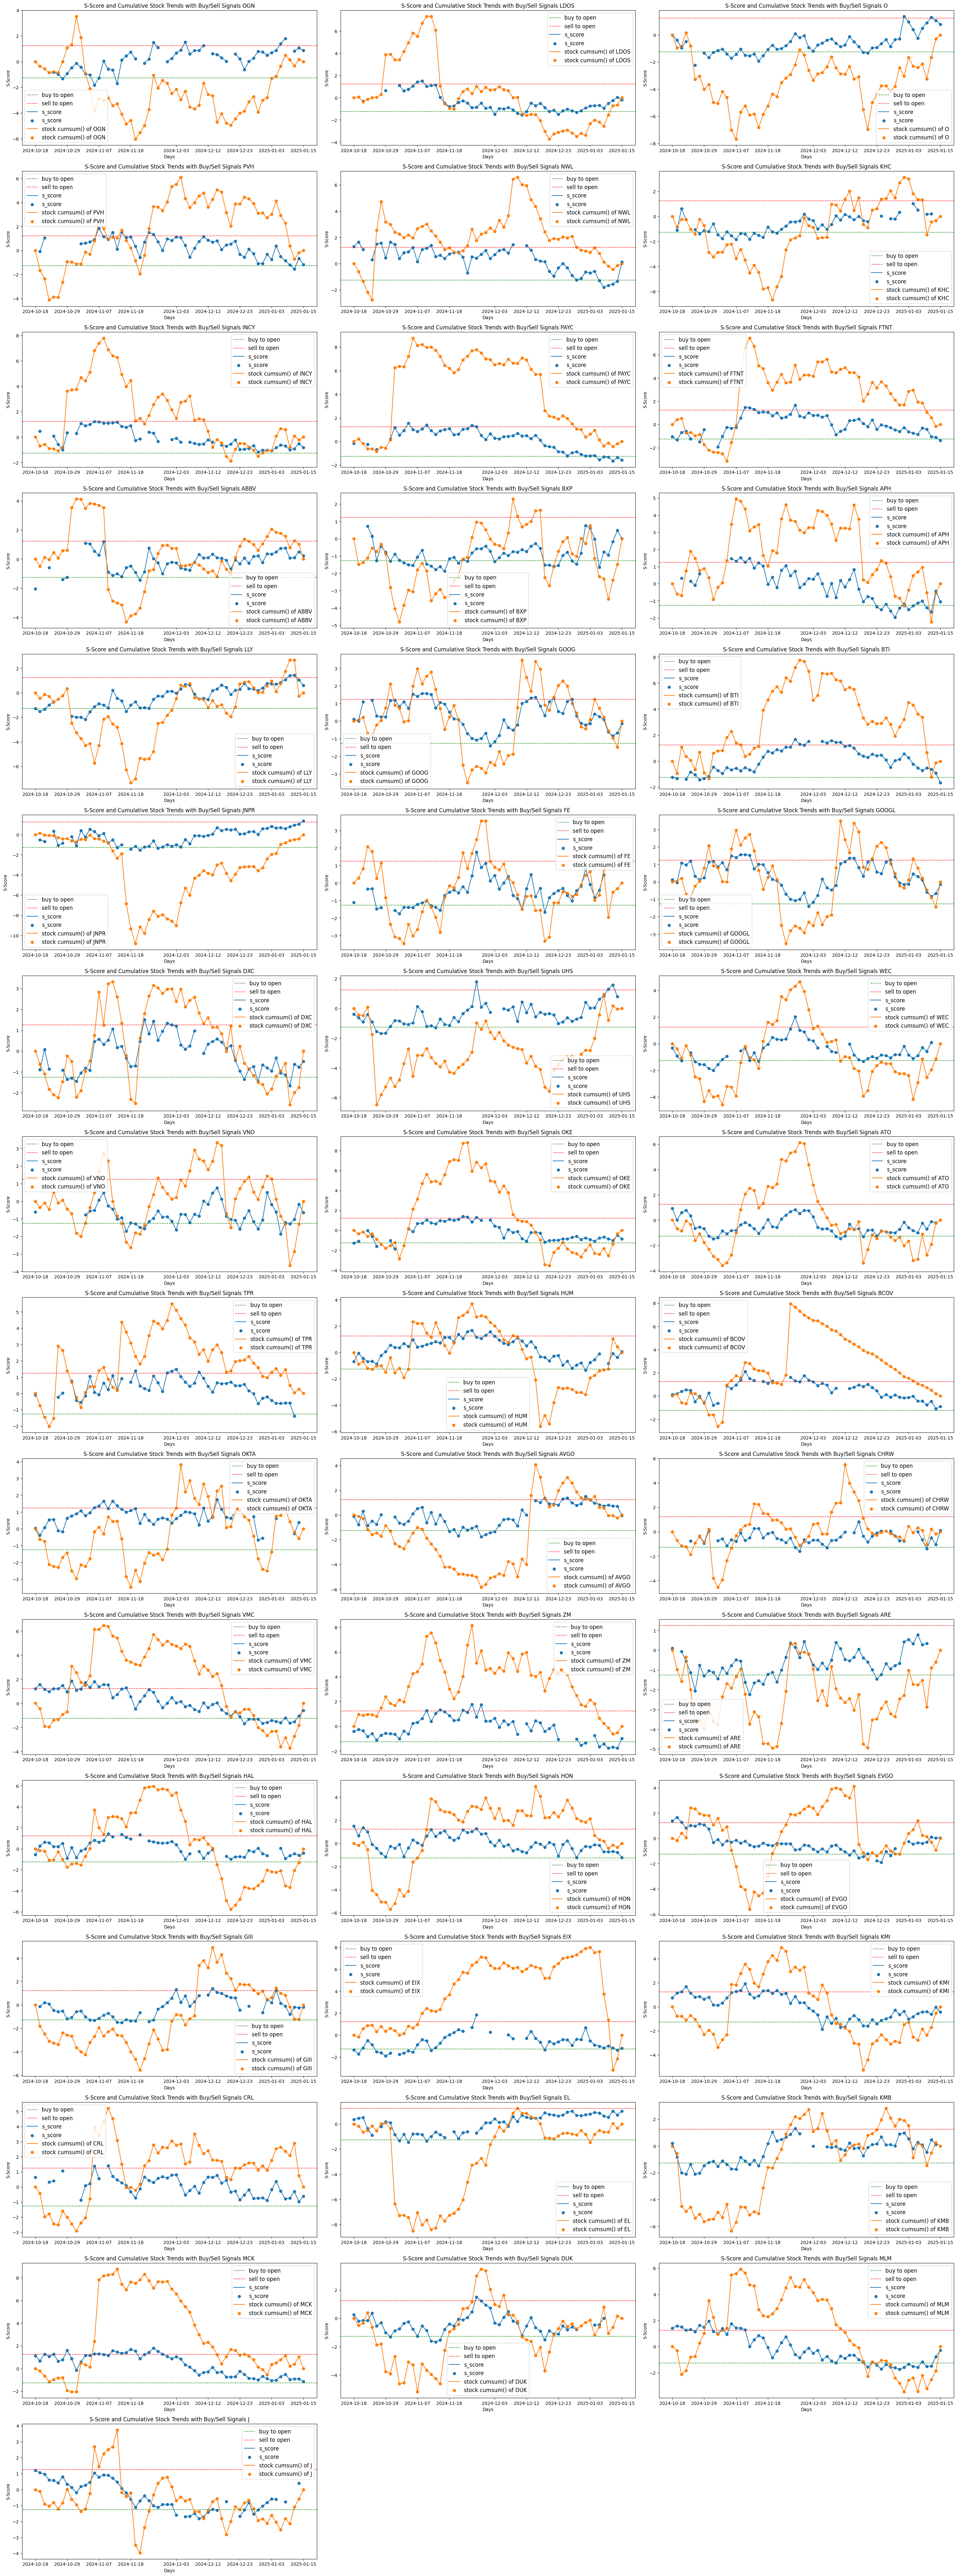

In [17]:
plot_s_scores(s_score_stocks,df_standardized,keys_with_10_nans)

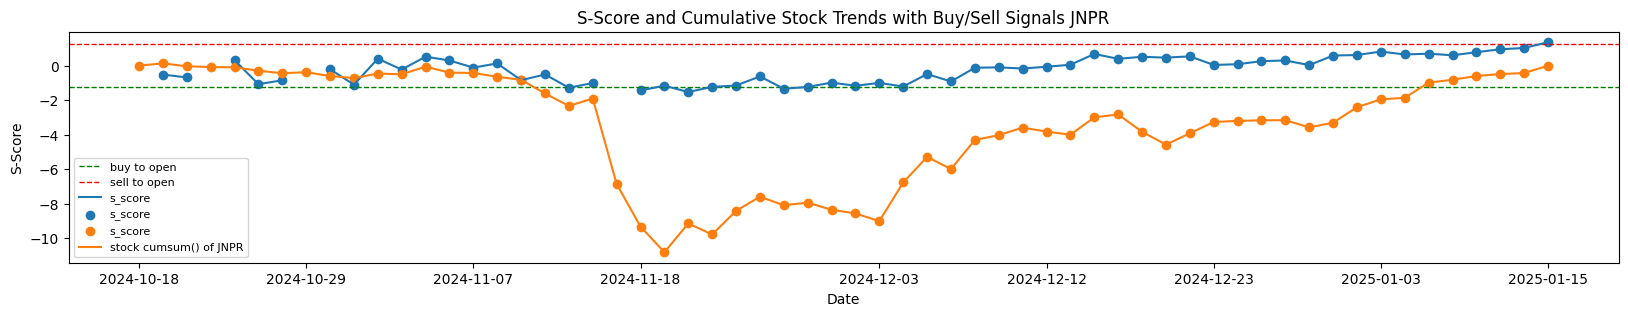

In [21]:
## If someone wants to plot individual s_scores.
plot_s_scores(s_score_stocks,df_standardized,['JNPR'])